Class Activity Submitted by:

Krishna Babu Menon: C0856683

Ansu Rachael Raju : C0861114

Abishek Murukesha Pillai Ramesh : C0859051

Neethu Narayanan : C0858319

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as model_selection
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

def evaluate_classifier(y_test,y_pred_class):
  print("Accuracy: ",accuracy_score(y_test,y_pred_class))
  print("Confusion Matrix:  \n ",confusion_matrix(y_test,y_pred_class))
  print("Classification Report: \n",classification_report(y_test,y_pred_class))

In [ ]:
def normalize_features(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  return X_train, X_test

## Load data

In [ ]:
adult_data =  pd.read_csv('/content/adult.data', sep=",",header=None)

In [ ]:
adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult_data.shape

(32561, 15)

In [ ]:
adult_data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                   'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Target']

In [ ]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult_data['Target'].unique

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Target, Length: 32561, dtype: object>

### Dropping the finalweight and education as it looks irrelevant for the data

In [ ]:
adult_data = adult_data.drop(["fnlwgt","education"], axis = 1)

### Checking the unique value for each column

In [ ]:
for i in adult_data.columns:
    print(adult_data[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[ 2174     0 14084  5178  5013  2407 14344 

### Replacing the ? symbol with null values

In [ ]:
adult_data = adult_data.replace([" ?"], np.nan)
adult_data.isnull().sum()

age                  0
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Target               0
dtype: int64

### Dropping the Null Values

In [ ]:
cleaned_adult_data=adult_data.dropna()

In [ ]:
cleaned_adult_data.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

### Extracting Numeric column

In [ ]:
adult_num_df=cleaned_adult_data[['age','education-num','capital-gain','capital-loss','hours-per-week','Target']]

In [ ]:
adult_num_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Target
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K


## Visualisation of data

In [ ]:
adult_num_df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238
std,13.134665,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
adult_num_df.isnull().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
Target            0
dtype: int64

<ipython-input-331-e0462d28a639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adult_num_df["age"],bins=10)


<Axes: xlabel='age', ylabel='Density'>

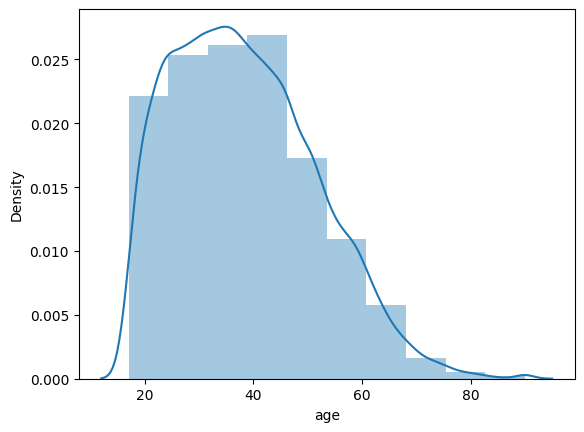

In [ ]:
sns.distplot(adult_num_df["age"],bins=10)

<ipython-input-332-bf12182f7cfc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adult_num_df["hours-per-week"],bins=10)


<Axes: xlabel='hours-per-week', ylabel='Density'>

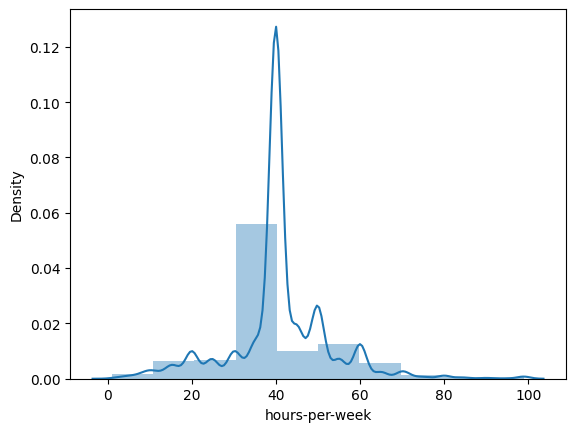

In [ ]:
sns.distplot(adult_num_df["hours-per-week"],bins=10)

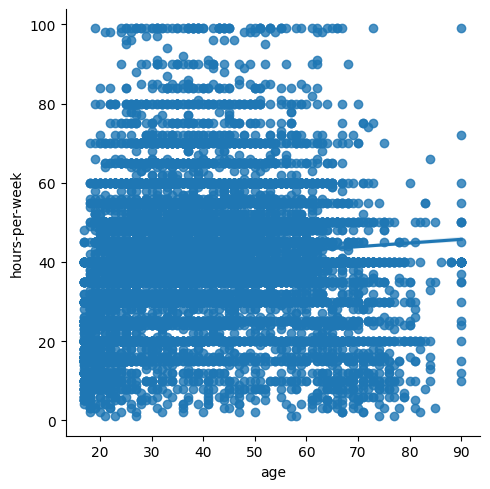

In [ ]:
sns.lmplot(x="age",y="hours-per-week",data=adult_num_df)

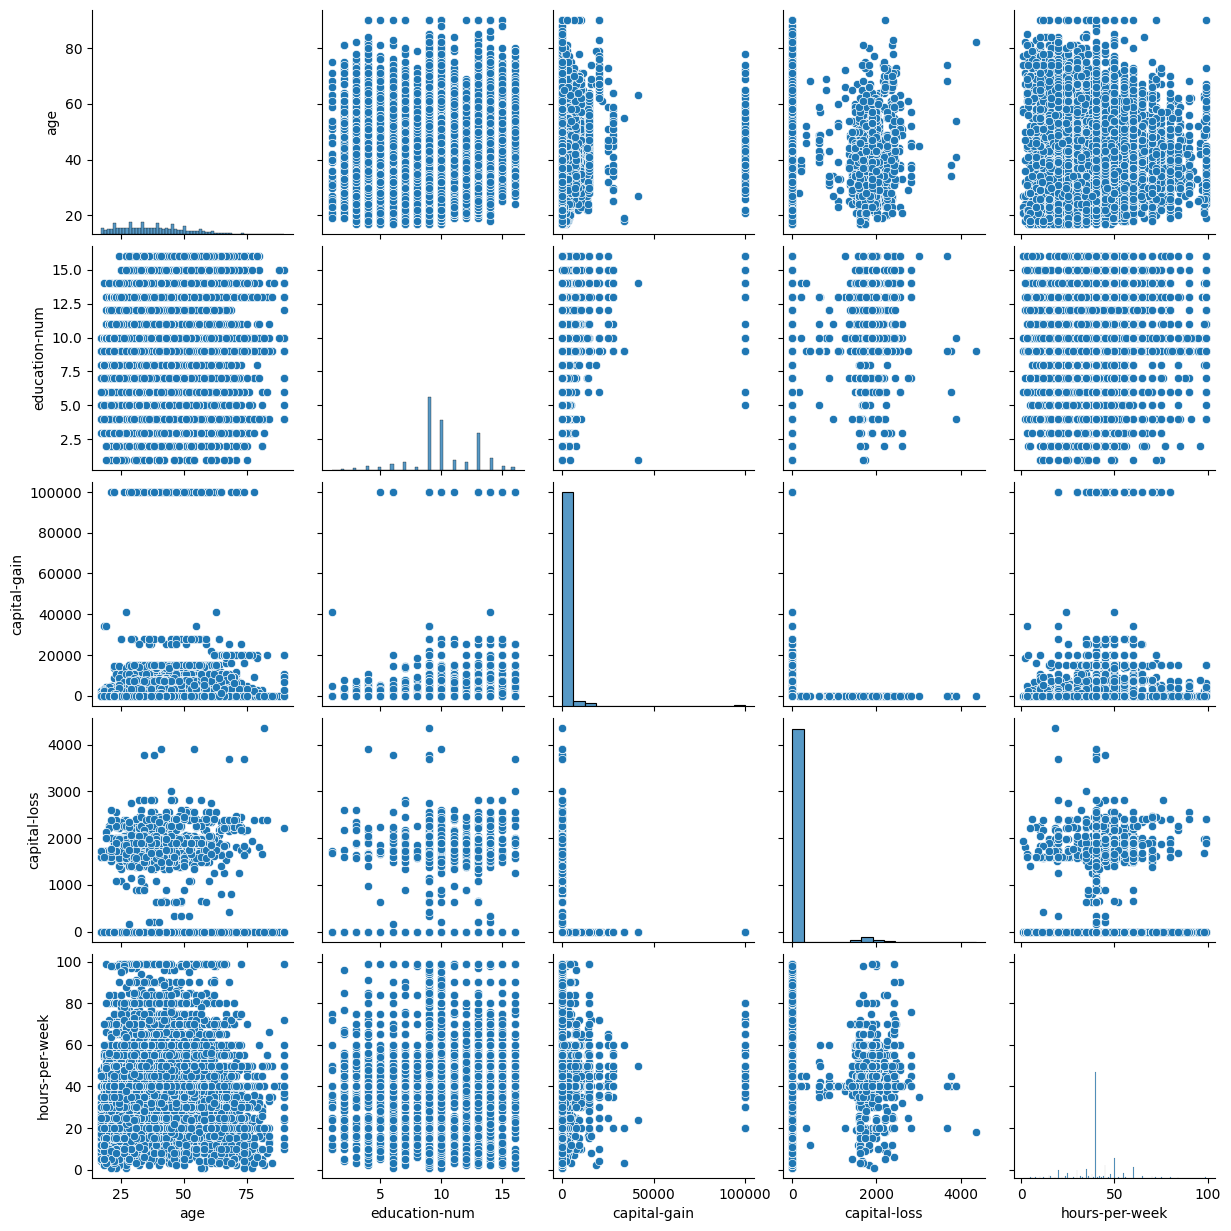

In [ ]:
sns.pairplot(adult_num_df)

In [ ]:
#sns.pairplot(adult_num_df,hue='label')

<ipython-input-336-967e0fa00203>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(adult_num_df.corr())


<Axes: >

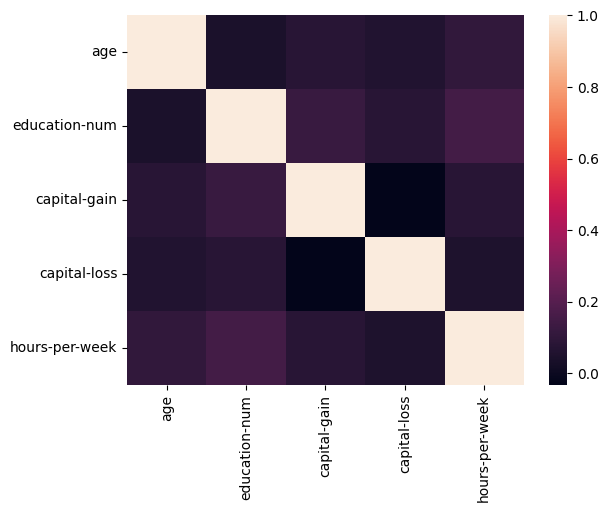

In [ ]:
sns.heatmap(adult_num_df.corr())

## Data Preparation

### Converting the target column to numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
label = le.fit_transform(adult_num_df['Target'])

In [ ]:
adult_num_df.drop("Target", axis=1, inplace=True)

<ipython-input-339-a28c47f9a8b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_num_df.drop("Target", axis=1, inplace=True)


In [ ]:
adult_num_df['Income'] = label

<ipython-input-340-6fb75a20b4f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_num_df['Income'] = label


In [ ]:
adult_num_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0


In [ ]:
X = adult_num_df[['age','education-num','capital-gain','capital-loss','hours-per-week']]

In [ ]:
y = adult_num_df[['Income']]

In [ ]:
X.shape,y.shape

((30162, 5), (30162, 1))

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24129, 5), (6033, 5), (24129, 1), (6033, 1))

### Normalisation

In [ ]:
X_trn, X_tst = normalize_features(X_train, X_test)

## Model Creation

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
lreg= LinearRegression()
lreg.fit(X_trn, y_train)

LinearRegression()

In [ ]:
y_pred= lreg.predict(X_tst)
y_pred

array([[-0.01774452],
       [ 0.19252473],
       [ 0.32030212],
       ...,
       [ 0.06607218],
       [ 0.23917791],
       [ 0.1600401 ]])

In [ ]:
y_pred_class = np.round(y_pred,0).astype(int)
y_pred_class

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
evaluate_classifier(y_test,y_pred_class)

Accuracy:  0.7889938670644787
Confusion Matrix:  
  [[4389  170    0]
 [1083  371   20]
 [   0    0    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.96      0.88      4559
           1       0.69      0.25      0.37      1474
           2       0.00      0.00      0.00         0

    accuracy                           0.79      6033
   macro avg       0.50      0.40      0.41      6033
weighted avg       0.77      0.79      0.75      6033



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_trn,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred= logreg.predict(X_tst)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
evaluate_classifier(y_test,y_pred)

Accuracy:  0.8098789988397149
Confusion Matrix:  
  [[4303  256]
 [ 891  583]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4559
           1       0.69      0.40      0.50      1474

    accuracy                           0.81      6033
   macro avg       0.76      0.67      0.69      6033
weighted avg       0.80      0.81      0.79      6033



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dectree = DecisionTreeClassifier(random_state=0)
dectree.fit(X_trn,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred= dectree.predict(X_tst)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
evaluate_classifier(y_test,y_pred)

Accuracy:  0.8163434443891928
Confusion Matrix:  
  [[4241  318]
 [ 790  684]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4559
           1       0.68      0.46      0.55      1474

    accuracy                           0.82      6033
   macro avg       0.76      0.70      0.72      6033
weighted avg       0.80      0.82      0.80      6033



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randfst = RandomForestClassifier(max_depth=3, random_state=0)
randfst.fit(X_trn,y_train)

<ipython-input-361-6aa8221923dd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randfst.fit(X_trn,y_train)


RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rand_pred= randfst.predict(X_tst)
rand_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
evaluate_classifier(y_test,rand_pred)

Accuracy:  0.820321564727333
Confusion Matrix:  
  [[4495   64]
 [1020  454]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.89      4559
           1       0.88      0.31      0.46      1474

    accuracy                           0.82      6033
   macro avg       0.85      0.65      0.67      6033
weighted avg       0.83      0.82      0.79      6033



## Converting Categorical variables to Numerical Variables

In [ ]:
cleaned_adult_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
le = LabelEncoder()
label = le.fit_transform(cleaned_adult_data['Target'])
cleaned_adult_data.drop("Target", axis=1, inplace=True)
cleaned_adult_data['Income'] = label

<ipython-input-365-ee7c77b79d94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_adult_data.drop("Target", axis=1, inplace=True)
<ipython-input-365-ee7c77b79d94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_adult_data['Income'] = label


In [ ]:
cleaned_adult_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
new_adult_data = pd.get_dummies(cleaned_adult_data)

In [ ]:
new_adult_data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting into test and train

In [ ]:
X = new_adult_data.drop('Income',axis=1)

In [ ]:
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = new_adult_data[['Income']]

In [ ]:
y.head()

,Income
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24129, 87), (6033, 87), (24129, 1), (6033, 1))

### Normalisation

In [ ]:
X_trn, X_tst = normalize_features(X_train, X_test)

### Model Creation

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
lreg= LinearRegression()
lreg.fit(X_trn, y_train)

LinearRegression()

In [ ]:
y_pred= lreg.predict(X_tst)
y_pred

array([[-0.03571449],
       [ 0.32657494],
       [ 0.18683495],
       ...,
       [ 0.08350243],
       [ 0.18608726],
       [ 0.00408043]])

In [ ]:
y_pred_class = np.round(y_pred,0).astype(int)
y_pred_class

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
evaluate_classifier(y_test,y_pred_class)

Accuracy:  0.8337477208685563
Confusion Matrix:  
  [[4269  290    0]
 [ 699  761   14]
 [   0    0    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4559
           1       0.72      0.52      0.60      1474
           2       0.00      0.00      0.00         0

    accuracy                           0.83      6033
   macro avg       0.53      0.48      0.50      6033
weighted avg       0.83      0.83      0.82      6033



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_trn,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred= logreg.predict(X_tst)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
evaluate_classifier(y_test,y_pred)

Accuracy:  0.8529753025029008
Confusion Matrix:  
  [[4252  307]
 [ 580  894]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4559
           1       0.74      0.61      0.67      1474

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dectree = DecisionTreeClassifier(random_state=0)
dectree.fit(X_trn,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred= dectree.predict(X_tst)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
evaluate_classifier(y_test,y_pred)

Accuracy:  0.8198242996850654
Confusion Matrix:  
  [[4046  513]
 [ 574  900]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4559
           1       0.64      0.61      0.62      1474

    accuracy                           0.82      6033
   macro avg       0.76      0.75      0.75      6033
weighted avg       0.82      0.82      0.82      6033



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randfst = RandomForestClassifier(max_depth=3, random_state=0)
randfst.fit(X_trn,y_train)

<ipython-input-389-6aa8221923dd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randfst.fit(X_trn,y_train)


RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rand_pred= randfst.predict(X_tst)
rand_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
evaluate_classifier(y_test,rand_pred)

Accuracy:  0.7878335819658545
Confusion Matrix:  
  [[4556    3]
 [1277  197]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4559
           1       0.98      0.13      0.24      1474

    accuracy                           0.79      6033
   macro avg       0.88      0.57      0.56      6033
weighted avg       0.83      0.79      0.72      6033



#Principal Componenet Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)

X_train = pca.fit_transform(X_trn)
X_test = pca.transform(X_tst)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[5.17027438e-02 3.02514658e-02 2.93581905e-02 2.33175113e-02
 2.09574952e-02 1.97675463e-02 1.88446578e-02 1.66046547e-02
 1.57314029e-02 1.44374285e-02 1.42536569e-02 1.40236100e-02
 1.37161498e-02 1.33569423e-02 1.31613898e-02 1.30000672e-02
 1.28556712e-02 1.27172302e-02 1.25538782e-02 1.24859813e-02
 1.24459736e-02 1.23559732e-02 1.22444717e-02 1.21250916e-02
 1.20854030e-02 1.19307406e-02 1.18528344e-02 1.17377361e-02
 1.17145879e-02 1.16185221e-02 1.15954115e-02 1.15723214e-02
 1.15464825e-02 1.15290572e-02 1.15253078e-02 1.15237873e-02
 1.15216325e-02 1.15156874e-02 1.15139922e-02 1.15120053e-02
 1.15098406e-02 1.15073274e-02 1.15070560e-02 1.15042706e-02
 1.15025785e-02 1.14946454e-02 1.14905355e-02 1.14815661e-02
 1.14676305e-02 1.14504344e-02 1.14318042e-02 1.14083252e-02
 1.13916535e-02 1.13836834e-02 1.13393341e-02 1.13253705e-02
 1.12597317e-02 1.12387431e-02 1.11862789e-02 1.10500224e-02
 1.09718030e-02 1.09287915e-02 1.07896966e-02 1.05105017e-02
 1.03685359e-02 1.031086

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

X_train = pca.fit_transform(X_trn)
X_test = pca.transform(X_tst)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.05170274 0.03025147 0.02935819 0.02331751 0.0209575  0.01976755
 0.01884466 0.01660465 0.0157314  0.01443743 0.01425366 0.01402361
 0.01371615 0.01335694 0.01316139 0.01300007 0.01285567 0.01271723
 0.01255388 0.01248598 0.01244597 0.01235597 0.01224447 0.01212509
 0.0120854  0.01193074 0.01185283 0.01173774 0.01171459 0.01161852
 0.01159541 0.01157232 0.01154648 0.01152906 0.01152531 0.01152379
 0.01152163 0.01151569 0.01151399 0.01151201 0.01150984 0.01150733
 0.01150706 0.01150427 0.01150258 0.01149465 0.01149054 0.01148157
 0.01146763 0.01145043 0.0114318  0.01140833 0.01139165 0.01138368
 0.01133933 0.01132537 0.01125973 0.01123874 0.01118628 0.01105002
 0.0109718  0.01092879 0.0107897  0.0105105  0.01036854 0.01031086
 0.01012461 0.0100437  0.00993158 0.00955793 0.00907779 0.0087119 ]


In [ ]:
pca.n_components_

72

###Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_trn,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred= logreg.predict(X_tst)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
evaluate_classifier(y_test,y_pred)

Accuracy:  0.8529753025029008
Confusion Matrix:  
  [[4252  307]
 [ 580  894]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4559
           1       0.74      0.61      0.67      1474

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033

